### Introduction
We will build an image classifier using the VGG16 & ResNet50 pre-trained models, and we will evaluate them and compare their performances.  

### Download Data

In [4]:
## get the data
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

--2020-01-29 17:23:07--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261483817 (249M) [application/zip]
Saving to: ‘concrete_data_week4.zip’

concrete_data_week4 100%[===================>] 249.37M  26.1MB/s    in 9.0s    

2020-01-29 17:23:20 (27.8 MB/s) - ‘concrete_data_week4.zip’ saved [261483817/261483817]



In [6]:
## unzip the data
!unzip concrete_data_week4.zip

## Part 1

Design a classifier using the VGG16 pre-trained model and the ResNet50 pre-trained model. And we'll follow the steps below:

1. Import libraries, modules, and packages, as well as to import the *preprocess_input* function from <code>keras.applications.vgg16</code>.
2. Use a batch size of 100 images for both training and validation.
3. Construct an ImageDataGenerator for the training set and another one for the validation set. VGG16 was originally trained on 224 × 224 images, so to address that when defining the ImageDataGenerator instances.
4. Create a sequential model using Keras. Add VGG16 model to it and dense layer.
5. Compile the mode using the adam optimizer and the categorical_crossentropy loss function.
6. Fit the model on the augmented data using the ImageDataGenerators.

Firstly let's import the needed libraries

In [1]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense

We will be leveraging the VGG16 & ResNet50 models to build and compare our classifiers

In [3]:
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

1. We are obviously dealing with two classes.
2. The VGG16 /ResNet50 model was built and trained using images of size (224 x 224). Therefore, we will have to resize our images from (227 x 227) to (224 x 224).
3. We will training and validating the model using batches of 100 images.

In [4]:
num_classes = 2

# image_resize = 224
batch_size_training = 100
batch_size_validation = 100

In [5]:
data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

In [6]:
## train_generator
train_generator = data_generator.flow_from_directory(
    'concrete_data_week4/train',
    target_size=(224, 224),
    shuffle=False,
    batch_size=batch_size_training,
    class_mode='categorical')

Found 30001 images belonging to 2 classes.


In [7]:
## validaiton_generator
validation_generator = data_generator.flow_from_directory(
    'concrete_data_week4/valid',
    #target_size=(image_resize=224, image_resize=224),
    target_size=(224, 224),
    shuffle=False,
    batch_size=batch_size_validation,
    class_mode='categorical')

Found 9501 images belonging to 2 classes.


In [8]:
# test_generator = ImageDataGenerator()

testT1_generator = data_generator.flow_from_directory(
    'concrete_data_week4/test',
    target_size=(224, 224),
    shuffle=False)

Found 500 images belonging to 2 classes.


We will use the Sequential model class from Keras.

In [9]:
## (i) using vgg16 model
_modelvg = Sequential()

Next, we will add the VGG16 /ResNet50 pre-trained model to out model. And, we actually want to define our own LAST LAYER and train it so that it is optimized for our image dataset. In order to leave out the last layer of the pre-trained model, we will use the argument include_top and set it to False.

In [10]:
_modelvg.add(VGG16(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    ))

We will define our last layer as a Dense layer, that consists of two nodes and uses the Softmax function as the activation function.

In [11]:
_modelvg.add(Dense(num_classes, activation='softmax'))

In [12]:
_modelvg.layers

In [13]:
_modelvg.layers[0].layers

In [14]:
## the VGG16 /ResNet50 model has already been trained ..[0] set to "false"
_modelvg.layers[0].trainable = False

In [15]:
## summarizing the model
_modelvg.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026      
Total params: 14,715,714
Trainable params: 1,026
Non-trainable params: 14,714,688
_________________________________________________________________


Next we compile our model using the adam optimizer.

In [16]:
_modelvg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Prepare for training...

In [17]:
steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(validation_generator)
num_epochs = 2

In [18]:
## the training was about a number of hours
fit_history = _modelvg.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
)

Epoch 1/2
301/301 [==============================] - 9065s 30s/step - loss: 0.2066 - accuracy: 0.9352 - val_loss: 0.0011 - val_accuracy: 0.9856
Epoch 2/2
301/301 [==============================] - 8383s 28s/step - loss: 0.0453 - accuracy: 0.9898 - val_loss: 1.1802e-05 - val_accuracy: 0.9931


In [19]:
## we save the model and we're ready to start using it to classify images

_modelvg.save('classifier_vgg_model_trained')

Similarly...using ResNet50 pre-trained model (..repeat the above steps)

In [20]:
## (ii)..Using ResNet50
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input

In [21]:
data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

In [22]:
## train_generator
train_generator = data_generator.flow_from_directory(
    'concrete_data_week4/train',
    target_size=(224, 224),
    shuffle=False,
    batch_size=batch_size_training,
    class_mode='categorical')

Found 30001 images belonging to 2 classes.


In [23]:
## validaiton_generator
validation_generator = data_generator.flow_from_directory(
    'concrete_data_week4/valid',
    #target_size=(image_resize=224, image_resize=224),
    target_size=(224, 224),
    shuffle=False,
    batch_size=batch_size_validation,
    class_mode='categorical')

Found 9501 images belonging to 2 classes.


In [24]:
# test_generator = ImageDataGenerator()

testT2_generator = data_generator.flow_from_directory(
    'concrete_data_week4/test',
    target_size=(224, 224),
    shuffle=False)

Found 500 images belonging to 2 classes.


In [25]:
_modelrn = Sequential()

In [26]:
_modelrn.add(ResNet50(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    ))

In [27]:
_modelrn.add(Dense(num_classes, activation='softmax'))

In [28]:
_modelrn.layers

In [29]:
## ..[0] set to "false"
_modelrn.layers[0].trainable = False

In [30]:
_modelrn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


In [31]:
_modelrn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Prepare for training...

In [32]:
steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(validation_generator)
num_epochs = 2

In [33]:
## similarly, the training was about a number of hours
fit_history = _modelrn.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
)

Epoch 1/2
301/301 [==============================] - 10410s 35s/step - loss: 0.7156 - accuracy: 0.6304 - val_loss: 0.1942 - val_accuracy: 0.8397
Epoch 2/2
301/301 [==============================] - 9866s 33s/step - loss: 0.4894 - accuracy: 0.7650 - val_loss: 0.3140 - val_accuracy: 0.7953


In [34]:
## we save the model and we're ready to start using it to classify images

_modelrn.save('classifier_resnet_model_trained')

## Part 2

We will evaluate your deep learning models on a test data:
1. Load the saved models.
2. Construct an ImageDataGenerator for the test set. For this ImageDataGenerator instance, we only need to pass the directory of the test images, target size, and the **shuffle** parameter and set it to False.
3. Use the **evaluate_generator** method to evaluate the models on the test data, by passing the above ImageDataGenerator as an argument. 
4. Print the performance of the classifier using the VGG16 pre-trained model.
5. Print the performance of the classifier using the ResNet pre-trained model.

In [35]:
modelT1 = keras.models.load_model('classifier_vgg_model_trained')

C:\Users\bista\Anaconda3\lib\site-packages\keras\engine\saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [36]:
modelT2 = keras.models.load_model('classifier_resnet_model_trained')

C:\Users\bista\Anaconda3\lib\site-packages\keras\engine\saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [37]:
n1_step = len(testT1_generator)
n2_step = len(testT2_generator)

In [38]:
##
score1 = modelT1.evaluate_generator(generator=testT1_generator, steps=n1_step)

In [39]:
##
score2 = modelT2.evaluate_generator(generator=testT2_generator, steps=n2_step)

Print both model performances...

In [40]:
print('Performance-classifier-VGG16-preTrained-model:',score1)
print('Performance-classifier-ResNet50-preTrained-model:',score2)
#print("Loss vgg16 : ", score_vgg16[0], "Accuracy vgg16: ", score_vgg16[1])

Performance-classifier-VGG16-preTrained-model: [0.008654744364321232, 0.9959999918937683]
Performance-classifier-ResNet50-preTrained-model: [0.6718495488166809, 0.8140000104904175]


In [ ]:
## the other method to print out:

#Print performance
#print("Performance ResNet:")
#print("- Loss:\t\t", evaluate_generator_resnet[0] )
#print("- Accuracy:\t", evaluate_generator_resnet[1])
#print("\nPerformance VGG16:")
#print("- Loss:\t\t", evaluate_generator_vgg16[0] )
#print("- Accuracy:\t", evaluate_generator_vgg16[1])

## Part 3

We will predict whether the images in the test data are images of cracked concrete or not:

1. Use the **predict_generator** method to predict the class of the images in the test data, by passing the test data ImageDataGenerator instance defined in the previous part as an argument.
2. Report the class predictions (formatting as following below) of the first five images in the test set.

<center>
    <ul style="list-style-type:none">
        <li>Positive</li>  
        <li>Negative</li> 
        <li>Positive</li>
        <li>Positive</li>
        <li>Negative</li>
    </ul>
</center>

#### Predictions (on using VGG16 pre-trained model).

In [41]:
testT1_generator.reset()
#testT2_generator.reset()

In [43]:
vgg_predict = modelT1.predict_generator(generator=testT1_generator, steps=n1_step, use_multiprocessing=False)

In [44]:
#resnet_predict = modelT2.predict_generator(generator=testT2_generator, steps=n_step, use_multiprocessing=False)

Report the class predictions and visualization

In [45]:
## 
vgg_predict[0]

array([0.99718684, 0.0028131 ], dtype=float32)

In [46]:
vgg_predict.shape

(500, 2)

In [63]:
vgg_predict[:10]

array([[0.99718684, 0.0028131 ],
       [0.6886216 , 0.3113784 ],
       [0.8588024 , 0.14119764],
       [0.9820394 , 0.01796066],
       [0.93513334, 0.06486662],
       [0.99326634, 0.00673368],
       [0.9985567 , 0.00144331],
       [0.9366556 , 0.06334437],
       [0.9899754 , 0.01002462],
       [0.9975141 , 0.00248584]], dtype=float32)

In [48]:
import os
import numpy as np
import pandas as pd

predicted_class_indices = np.argmax(vgg_predict,axis=1)

In [49]:
## ...
labels = (testT1_generator.class_indices)
labels.items()

dict_items([('negative', 0), ('positive', 1)])

In [50]:
labels = (testT1_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [51]:
predictions[:5]

['negative', 'negative', 'negative', 'negative', 'negative']

In [52]:
file_names = testT1_generator.filenames
_output=pd.DataFrame({"Filename":file_names,
                      "Predictions":predictions})

In [68]:
_output.head()

,Filename,Predictions
0,negative\19751.jpg,negative
1,negative\19752.jpg,negative
2,negative\19753.jpg,negative
3,negative\19754.jpg,negative
4,negative\19755.jpg,negative


#### On using ResNet50 pre-trained model (..repeat the above steps)

In [69]:
testT2_generator.reset()

In [70]:
resnet_predict = modelT2.predict_generator(generator=testT2_generator, steps=n2_step, use_multiprocessing=False)

In [71]:
resnet_predict[:10]

array([[0.98644596, 0.01355408],
       [0.99440974, 0.00559025],
       [0.9900608 , 0.00993922],
       [0.9799921 , 0.0200079 ],
       [0.86841685, 0.13158312],
       [0.98780847, 0.01219157],
       [0.99557626, 0.00442372],
       [0.9570476 , 0.0429524 ],
       [0.9768984 , 0.02310154],
       [0.95916057, 0.04083952]], dtype=float32)

In [72]:
predicted_class2_indices = np.argmax(resnet_predict,axis=1)

In [73]:
label2 = (testT2_generator.class_indices)
label2 = dict((v,k) for k,v in label2.items())
prediction2 = [label2[k] for k in predicted_class2_indices]

In [74]:
prediction2[:5]

['negative', 'negative', 'negative', 'negative', 'negative']

In [75]:
file2_names = testT2_generator.filenames
_output2=pd.DataFrame({"Filename":file2_names,
                      "Predictions":prediction2})

_output2.head()

,Filename,Predictions
0,negative\19751.jpg,negative
1,negative\19752.jpg,negative
2,negative\19753.jpg,negative
3,negative\19754.jpg,negative
4,negative\19755.jpg,negative


In [ ]:
## ..another method ..A1
# image_predictions_resnet = model_resnet.predict_generator(test_generator, verbose=1)

   ## Get classes by np.round
# cl = np.round(image_predictions_resnet)

   ## Get filenames (set shuffle=false in generator is important)
# filenames=test_generator.filenames
# results=pd.DataFrame({"file":filenames,"pr":image_predictions_resnet[:,0], "class":cl[:,0]})

# results['class'] = results['class'].map({1: "Negative", 0: "Positive"})

# results[0:5][:]

In [ ]:
## ..another method ..A2
#print("Predictions ResNet:")
#for x in range (5):
    #if predict_generator_resnet[x][1] >= 0.5:
        #predict = "Positive"
    #else:
        #predict = "Negative"
    #print(x+1,":",predict,predict_generator_resnet[x])

#### Let's now visualizing the actual images...

In [54]:
dat_generator = ImageDataGenerator(
    rescale=1./255
)

In [55]:
## os.listdir('concrete_data_week4')

In [59]:
image_generator = dat_generator.flow_from_directory(
    'concrete_data_week4/test',
    batch_size=4,
    class_mode='categorical',
    seed=24
    )

Found 500 images belonging to 2 classes.


In [66]:
first_batch_images = image_generator.next()[0]

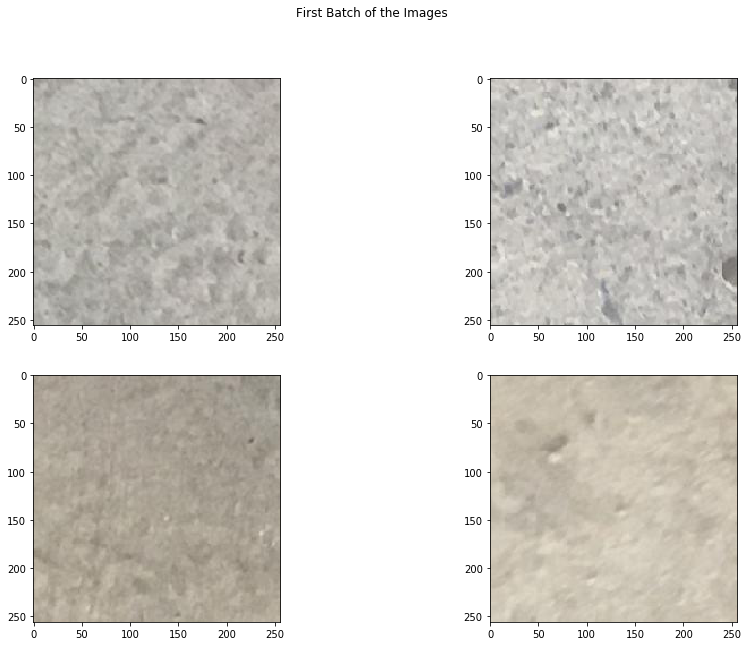

In [67]:
## visualizing
import os
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10)) 

ind = 0
for ax1 in axs:
    for ax2 in ax1: 
        image_data = first_batch_images[ind]
        ax2.imshow(image_data)
        ind += 1

fig.suptitle('First Batch of the Images') 
plt.show()

#### Thank you!